In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df_artists = pd.read_csv("top_artist_lastfm.csv")
df_tracks = pd.read_csv("top_tracks_lastfm.csv")

Definimos la columna de la tabla de artistas con otro nombre para facilitarnos nuestra búsqueda

In [75]:
df_artists = df_artists.rename(columns ={"name":"artist"})
df_artists = df_artists.reset_index().rename(columns={"index": "rank"})
df_artists.head(5)

,rank,artist,playcount,listeners
0,0,The Weeknd,1072030651,5169363
1,1,Radiohead,1321785944,8075683
2,2,Taylor Swift,3549523924,5802848
3,3,Kendrick Lamar,991845742,4959091
4,4,Drake,1100103357,6586123


In [65]:
df_tracks = df_tracks.reset_index().rename(columns={"index": "rank"})
df_tracks.head()

,rank,name,duration,playcount,listeners,artist
0,0,End of Beginning,159,30047095,1842715,Djo
1,1,HELICOPTER,160,916059,259280,A$AP Rocky
2,2,Stateside + Zara Larsson,176,4836427,457591,PinkPantheress
3,3,Order of Protection,171,458952,227471,A$AP Rocky
4,4,Fame Is a Gun,181,14415190,818427,Addison Rae


¿Cuál es el promedio de los playcount de los artistas?

In [10]:
promedio_reproducciones = df_artists["playcount"].mean()
print(f"La media de reproducciones de los artistas es de {promedio_reproducciones}")

La media de reproducciones de los artistas es de 670168547.2


¿Cuál es el playcount mínimo y máximo de los artistas?

In [8]:
playcount_minimo = df_artists["playcount"].min()
print(f"El playcount mínimo es {playcount_minimo}")

El playcount mínimo es 69870414


In [9]:
playcount_maximo = df_artists["playcount"].max()
print(f"El playcount máximo es {playcount_maximo}")

El playcount máximo es 3549523924


¿Cuál es el promedio de listeners por artista?

In [12]:
promedio_oyentes = df_artists["listeners"].mean()
print(f"El promedio de oyentes por artista es de {promedio_oyentes}")

El promedio de oyentes por artista es de 4607334.12


¿Cuál es la desviación estándar del playcount en artistas?

In [15]:
desviacion_artistas = df_artists["playcount"].std()
print(f"La desviación estándar de reproducciones según los artistas es de {desviacion_artistas}")

La desviación estándar de reproducciones según los artistas es de 536535014.6941828


¿Qué artista tiene el mayor playcount?

In [31]:
df_artists.sort_values(by = "playcount", ascending = False).head(1).reset_index()

,index,rank,artist,playcount,listeners
0,2,2,Taylor Swift,3549523924,5802848


¿Qué artista tiene el mayor número de listeners?

In [32]:
df_artists.sort_values(by = "listeners", ascending = False).head(1).reset_index()

,index,rank,artist,playcount,listeners
0,33,33,Coldplay,765636268,8950442


¿Cuál es el playcount promedio de las canciones?

In [39]:
promedio_canciones = df_tracks["playcount"].mean()
print(f"El promedio de reproducciones de las canciones es de {promedio_canciones}")

El promedio de reproducciones de las canciones es de 17055700.98


¿Cuál es el rango (min-max) de playcounts en tracks?

In [42]:
minimo = df_tracks["playcount"].min()
maximo = df_tracks["playcount"].max()
print(f"El rango de reproducciones por canciones va desde {minimo} hasta {maximo}")

El rango de reproducciones por canciones va desde 240029 hasta 56656449


¿Existe mucha diferencia entre la media y la mediana del palycount?

In [48]:
mediana_artistas = df_artists["playcount"].median()
mediana_artistas

np.float64(561452458.0)

In [55]:
print(f"En la tabla de artistas encontramos que la mediana y la media distan bastante entre ellas: siendo la media de {promedio_reproducciones} y la mediana {mediana_artistas}")

En la tabla de artistas encontramos que la mediana y la media distan bastante entre ellas: siendo la media de 670168547.2 y la mediana 561452458.0


In [49]:
mediana_tracks = df_tracks["playcount"].median()
mediana_tracks

np.float64(11883733.5)

In [56]:
print(f"En la tabla de canciones encontramos que la mediana y la media no distan mucho: siendo la media de {promedio_canciones} y la mediana {mediana_tracks}")

En la tabla de canciones encontramos que la mediana y la media no distan mucho: siendo la media de 17055700.98 y la mediana 11883733.5


¿Qué variable muestra mayor variabilidad: playcount o listeners?

In [57]:
df_artists.describe()

,playcount,listeners
count,5.000000e+01,5.000000e+01
mean,6.701685e+08,4.607334e+06
std,5.365350e+08,1.857737e+06
min,6.987041e+07,2.040558e+06
25%,3.359698e+08,3.129010e+06
50%,5.614525e+08,4.126626e+06
75%,7.901899e+08,6.154120e+06
max,3.549524e+09,8.950442e+06


In [61]:
print(f"En nuetra tabla de artistas vemos mayor varianza en las reproducciones que en los oyentes")

En nuetra tabla de artistas vemos mayor varianza en las reproducciones que en los oyentes


In [58]:
df_tracks.describe()

,duration,playcount,listeners
count,50.000000,5.000000e+01,5.000000e+01
mean,213.340000,1.705570e+07,1.118965e+06
std,54.257741,1.807506e+07,1.000903e+06
min,49.000000,2.400290e+05,1.209680e+05
25%,184.250000,5.548730e+05,2.135030e+05
50%,209.000000,1.188373e+07,8.334555e+05
75%,233.750000,2.850150e+07,1.859637e+06
max,403.000000,5.665645e+07,3.950276e+06


In [62]:
print(f"En nuestra tabla de canciones encontramos también mayor variabilidad entre las reproducciones más que en los oyentes")

En nuestra tabla de canciones encontramos también mayor variabilidad entre las reproducciones más que en los oyentes


¿ Cuál es la distribución del playcount de artistas?

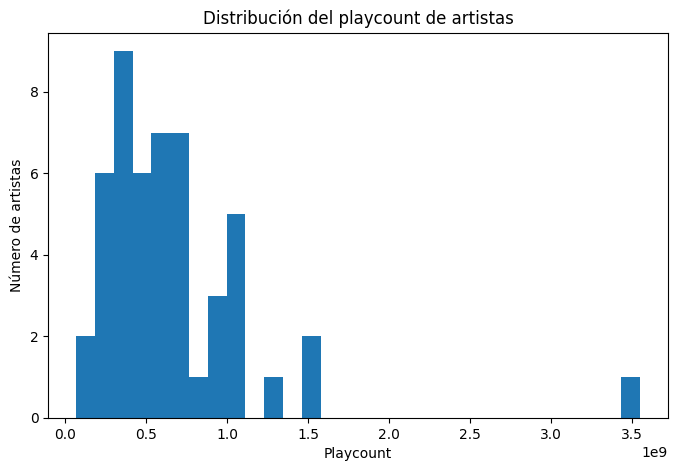

In [63]:
plt.figure(figsize=(8, 5))
plt.hist(df_artists["playcount"], bins=30)
plt.xlabel("Playcount")
plt.ylabel("Número de artistas")
plt.title("Distribución del playcount de artistas")
plt.show()

In [64]:
print(f"La distribución de las reproducciones según los artistas como vemos está sesgada totalmente a la derecha, una forma casi logarítmica")

La distribución de las reproducciones según los artistas como vemos está sesgada totalmente a la derecha, una forma casi logarítmica


¿ Cuál es la distribución del playcount de las canciones?

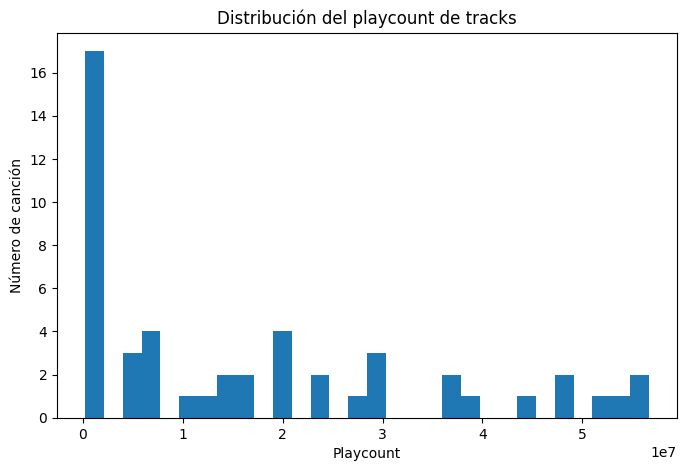

In [66]:
plt.figure(figsize=(8, 5))
plt.hist(df_tracks["playcount"], bins=30)
plt.xlabel("Playcount")
plt.ylabel("Número de canción")
plt.title("Distribución del playcount de tracks")
plt.show()

In [67]:
print(f"Ambas distribuciones se consideran de Long Tail. En ellas pocos elementos concentran la mayoría del valor y el resto son muchos elementos con valores muy pequeños.")

Ambas distribuciones se consideran de Long Tail. En ellas pocos elementos concentran la mayoría del valor y el resto son muchos elementos con valores muy pequeños.


Graficar mediante un gráfico de barras el top 10 artistas

In [76]:
df_artists_sorted = df_artists.sort_values(by = "playcount", ascending = False)
df_artists_top10 = df_artists_sorted.head(10).reset_index()
df_artists_top10

,index,rank,artist,playcount,listeners
0,2,2,Taylor Swift,3549523924,5802848
1,14,14,Lana Del Rey,1513314368,5117837
2,6,6,Kanye West,1463540203,7801902
3,1,1,Radiohead,1321785944,8075683
4,4,4,Drake,1100103357,6586123
5,0,0,The Weeknd,1072030651,5169363
6,49,49,The Beatles,1070202416,6391688
7,5,5,Ariana Grande,1053196403,4349182
8,9,9,"Tyler, The Creator",1007203348,4199143
9,7,7,Lady Gaga,993861520,7559715


<Axes: xlabel='playcount', ylabel='artist'>

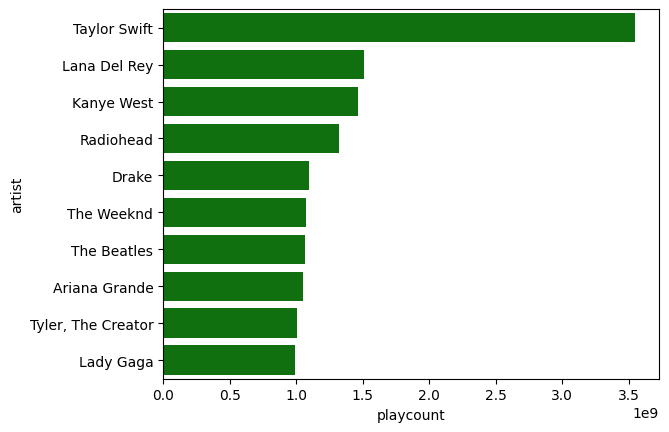

In [77]:
sns.barplot(data = df_artists_top10, x = "playcount", y = "artist", color = "green")

Graficar mediante un gráfico de barras el top 10 canciones

In [79]:
df_tracks_top10 = df_tracks.sort_values("playcount", ascending = False).head(10)
df_tracks_top10

,rank,name,duration,playcount,listeners,artist
20,20,Creep,235,56656449,3950276,Radiohead
24,24,"Good Luck, Babe!",218,56409314,1989609,Chappell Roan
33,33,505,305,54702467,2896692,Arctic Monkeys
47,47,BIRDS OF A FEATHER,183,52587674,2123270,Billie Eilish
40,40,Sweater Weather,240,47343801,2847403,The Neighbourhood
43,43,Lovers Rock,213,47337152,2066515,TV Girl
21,21,The Less I Know the Better,217,45063411,2615322,Tame Impala
39,39,Duvet,203,38230787,1865278,bôa
42,42,Feel Good Inc.,236,37445413,3132123,Gorillaz
32,32,Let Down,337,36925456,2390337,Radiohead


<Axes: xlabel='playcount', ylabel='artist'>

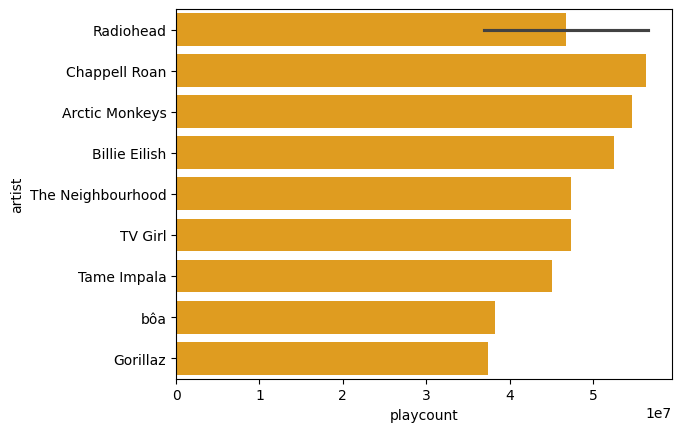

In [80]:
sns.barplot(data = df_tracks_top10, x = "playcount", y = "artist", color = "orange")

Representamos la distribución de los listeners por artista

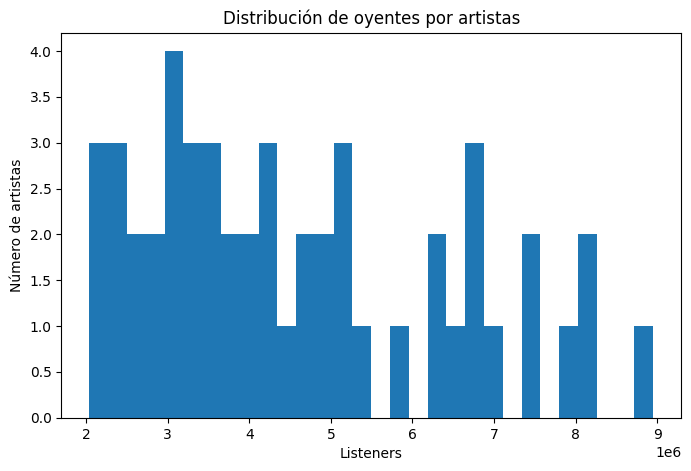

In [82]:
plt.figure(figsize=(8, 5))
plt.hist(df_artists["listeners"], bins=30)
plt.xlabel("Listeners")
plt.ylabel("Número de artistas")
plt.title("Distribución de oyentes por artistas")
plt.show()

¿Qué artistas destacan visualmente como outliers?

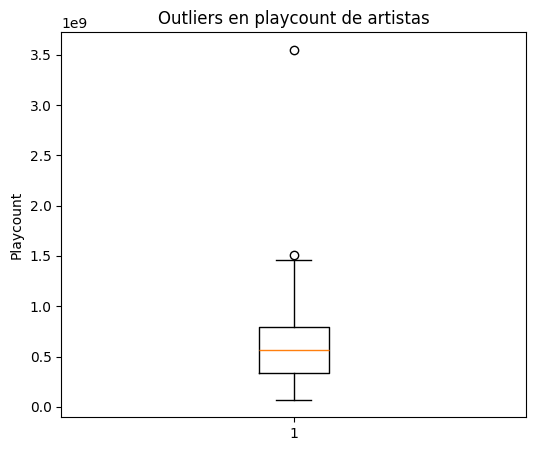

In [84]:
plt.figure(figsize=(6, 5))
plt.boxplot(df_artists["playcount"])
plt.ylabel("Playcount")
plt.title("Outliers en playcount de artistas")
plt.show()

Comparar visualmente los playcount vs los listeners en la tabla de artistas

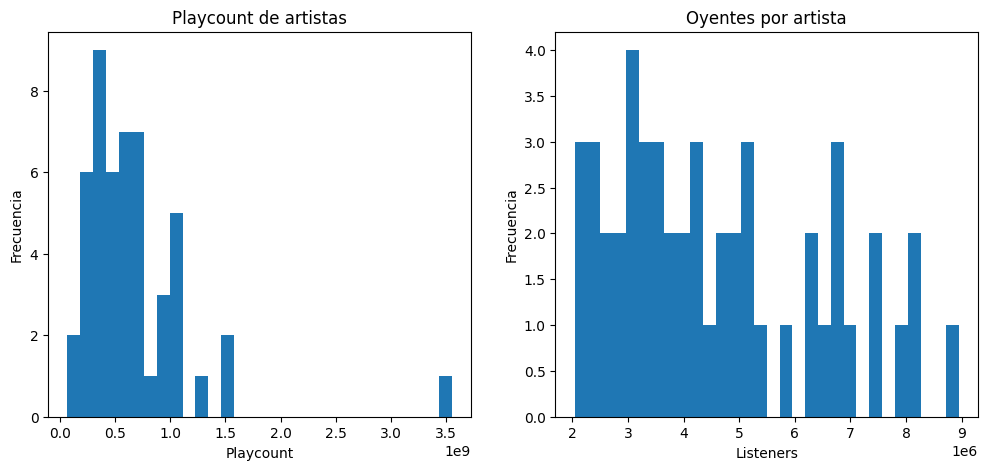

In [86]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_artists["playcount"], bins=30)
plt.title("Playcount de artistas")
plt.xlabel("Playcount")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df_artists["listeners"], bins=30)
plt.title("Oyentes por artista")
plt.xlabel("Listeners")
plt.ylabel("Frecuencia")

plt.show()

Comparación visualmente las distribuciones de artistas y canciones

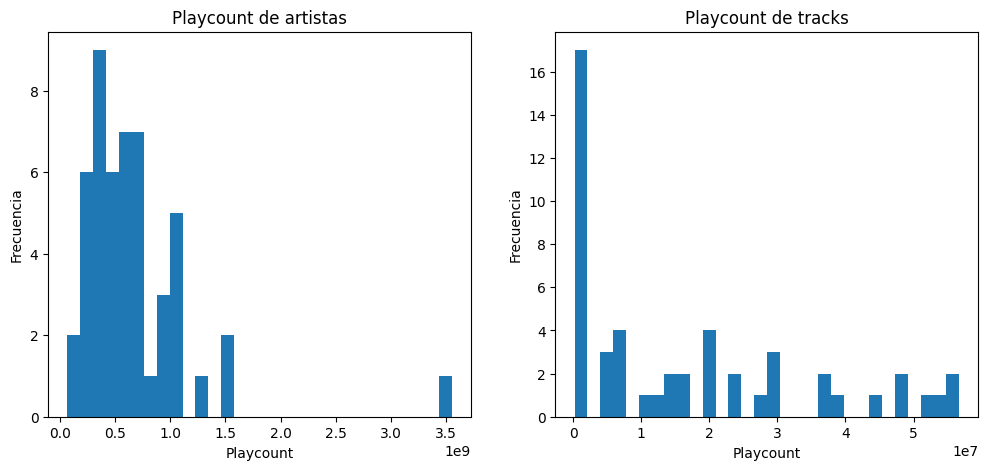

In [87]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_artists["playcount"], bins=30)
plt.title("Playcount de artistas")
plt.xlabel("Playcount")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df_tracks["playcount"], bins=30)
plt.title("Playcount de tracks")
plt.xlabel("Playcount")
plt.ylabel("Frecuencia")

plt.show()

In [88]:
print(f"Ambos gráficos nos presenta una distribución de Long Tail. En en DataFrame de tracks observamos mayor dispersión que en la de artistas.")

Ambos gráficos nos presenta una distribución de Long Tail. En en DataFrame de tracks observamos mayor dispersión que en la de artistas.


Canciones de Top Tracks cuyos artistas están en los Top Artists.

In [90]:
tracks_top_artist = df_tracks.merge(df_artists[["artist"]],on="artist",how="inner")
tracks_top_artist = df_tracks[df_tracks["artist"].isin(df_artists["artist"])].sort_values(by ="rank", ascending=False).reset_index(drop=True)
tracks_top_artist.head(10)

,rank,name,duration,playcount,listeners,artist
0,49,Where's My Phone?,189,563894,120968,Mitski
1,48,The End,214,240029,121597,A$AP Rocky
2,47,BIRDS OF A FEATHER,183,52587674,2123270,Billie Eilish
3,46,Sports car,165,19537205,848484,Tate McRae
4,44,That's What I Like,206,16455705,1762107,Bruno Mars
5,43,Lovers Rock,213,47337152,2066515,TV Girl
6,42,Feel Good Inc.,236,37445413,3132123,Gorillaz
7,41,ROBBERY,235,292238,130607,A$AP Rocky
8,40,Sweater Weather,240,47343801,2847403,The Neighbourhood
9,37,Tears,160,12638647,910290,Sabrina Carpenter


Artistas con más de una canción top

In [91]:
artistas_mas_de_una = tracks_top_artist["artist"].value_counts().reset_index()
artistas_mas_de_una.columns = ["Artist", "Top_Songs"]
artistas_mas_de_una.head(5)

,Artist,Top_Songs
0,A$AP Rocky,15
1,Bruno Mars,3
2,Zara Larsson,2
3,Sabrina Carpenter,2
4,The Marías,2


Concentración de canciones en artistas top

In [93]:
tracks_in_top_artist = df_tracks[df_tracks["artist"].isin(df_artists["artist"])]
tracks_in_top_artist["artist"].value_counts()
tracks_in_top_artist.groupby("artist").size().sort_values(ascending=False)
porcentaje = len(tracks_in_top_artist) / len(df_tracks) * 100
print(f"El {porcentaje}% de las canciones top pertenecen a artistas top")

El 76.0% de las canciones top pertenecen a artistas top


Extraer los one hit wonders

In [94]:
df_tracks["one_hit_wonder"] = df_tracks.groupby("artist")["playcount"].transform(lambda x: (x.max() == x) & (len(x) == 1))
df_tracks["one_hit_wonder"].value_counts()

one_hit_wonder
False    28
True     22
Name: count, dtype: int64

In [95]:
porcentaje = (22/ 50) * 100
print(f" En el data set, el {porcentaje}% de los artistas son considerados “one-hit wonders”,es decir, alcanzan gran popularidad con una única canción.")

 En el data set, el 44.0% de los artistas son considerados “one-hit wonders”,es decir, alcanzan gran popularidad con una única canción.


Porcentaje del top tracks dominado por artistas

In [97]:
df_tracks["artist"].values
tracks_top_artistas = set(df_tracks["artist"].values).intersection(df_artists["artist"])
tracks_top_artistas

{'A$AP Rocky',
 'Arctic Monkeys',
 'Billie Eilish',
 'Bruno Mars',
 'Chappell Roan',
 'Djo',
 'Gorillaz',
 'Mitski',
 'PinkPantheress',
 'Radiohead',
 'Sabrina Carpenter',
 'TV Girl',
 'Tame Impala',
 'Tate McRae',
 'Taylor Swift',
 'The Marías',
 'The Neighbourhood',
 'Zara Larsson'}

In [98]:
porcentaje = len(tracks_top_artistas)/ len(df_artists["artist"].value_counts())*100
print(f"El porcentaje de top tracks que están dominados por top artistas es {porcentaje}%")

El porcentaje de top tracks que están dominados por top artistas es 36.0%


Grado de concentración del mercado

In [27]:
artist_market = (df_tracks.groupby("artist")["playcount"].sum())
artist_market.sort_values(ascending = False)

artist
Radiohead            93581905
Chappell Roan        56409314
Arctic Monkeys       54702467
Billie Eilish        52587674
The Neighbourhood    47343801
TV Girl              47337152
The Marías           46131451
Tame Impala          45063411
Bruno Mars           41265910
bôa                  38230787
Gorillaz             37445413
Sabrina Carpenter    32215486
Djo                  30047095
The Goo Goo Dolls    28638481
Jeff Buckley         28090577
The Police           24674926
sombr                20505188
Taylor Swift         20025362
Tate McRae           19537205
Zara Larsson         18005933
KATSEYE              15108878
Addison Rae          14415190
Olivia Dean          10994646
RAYE                  7065220
A$AP Rocky            7021805
EsDeeKid              5979251
She & Him             4960200
PinkPantheress        4836427
Mitski                 563894
Name: playcount, dtype: int64

In [28]:
df_artist_total = df_tracks.groupby("artist").agg(total_playcount=("playcount", "sum"), total_listeners=("listeners", "sum"),n_tracks=("name", "count")).sort_values("n_tracks", ascending=False)
df_artist_total

,total_playcount,total_listeners,n_tracks
artist,,,
A$AP Rocky,7021805,2708984,15
Bruno Mars,41265910,4371612,3
Olivia Dean,10994646,1280442,2
Radiohead,93581905,6340613,2
Sabrina Carpenter,32215486,2001631,2
The Marías,46131451,2490251,2
Zara Larsson,18005933,1720996,2
EsDeeKid,5979251,520674,1
Djo,30047095,1842715,1


In [29]:
#Sumamos los playcount de los top artistas que tienen más de 1 track en la lista de top_tracks. Dividimos entre el total de playcount 
df_artist_total.head(7)["total_playcount"].sum()/df_artist_total["total_playcount"].sum()

np.float64(0.2922391009226054)

Comparamos la desigualdad entre los artistas y las canciones

In [99]:
artist_streams = df_tracks.groupby("artist")["rank"].sum().sort_values(ascending=False)
artist_prop = artist_streams / artist_streams.sum()
top_concentrated = artist_prop[artist_prop > 0.05]
top_concentrated

artist
A$AP Rocky           0.232653
Bruno Mars           0.073469
Olivia Dean          0.055510
Sabrina Carpenter    0.055510
Name: rank, dtype: float64

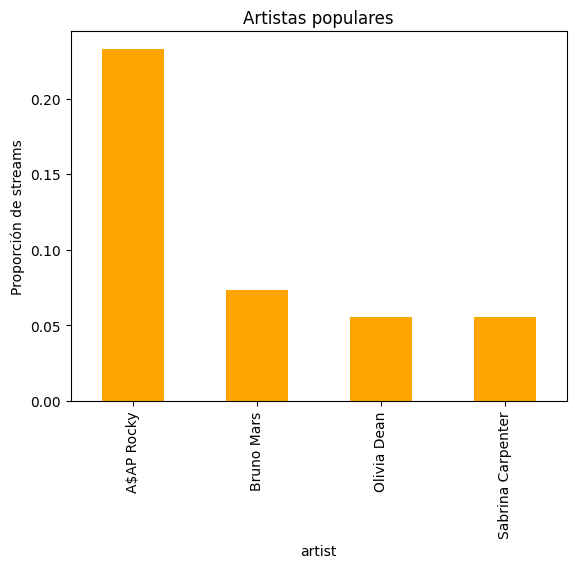

In [100]:
top_concentrated.plot(kind="bar", color="orange")
plt.ylabel("Proporción de streams")
plt.title("Artistas populares")
plt.show()